# Data Preprocessing

1. Inisialisasi
2. Memilah attribute yang digunakan
3. Labeling By Rating
4. Resampling with Undersampling
5. Noise Removal



**Inisialisasi Dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("SGA_review_expanded.xlsx")

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   published_date      10000 non-null  datetime64[ns]
 1   published_platform  10000 non-null  object        
 2   rating              10000 non-null  int64         
 3   type                10000 non-null  object        
 4   text                10000 non-null  object        
 5   title               9999 non-null   object        
 6   helpful_votes       10000 non-null  int64         
 7   airplane_type       10000 non-null  object        
 8   airplane_code       10000 non-null  object        
 9   route               10000 non-null  object        
 10  cabin_class         10000 non-null  object        
 11  seat_number         10000 non-null  object        
 12  flight_duration     10000 non-null  object        
 13  departure_time      10000 non-null  object     

**Memilah attribute yang digunakan**

In [ ]:
df = df[['published_date', 'rating', 'text', 'route']]

In [ ]:
df.isnull().sum()

,0
published_date,0
rating,0
text,0
route,0


**Labeling By Rating**

In [ ]:
def inisialisasi_label_rating(rating):
  if rating in [1,2]:
    return 0  #Sentimen Negatif
  elif rating == 3:
    return 1  #Sentimen Netral
  else:
    return 2  #Sentimen Positif

df['label'] = df['rating'].apply(inisialisasi_label_rating) #Menambahkan kolom baru sebagai labeling

print(df[['rating', 'label']].head())

   rating  label
0       3      1
1       5      2
2       1      0
3       5      2
4       2      0


**Penjelasan Output**

1 & 2 → 0 (Negatif)

3 → 1 (Netral)

4 & 5 → 2 (Positif)

Pada kolom rating disini menggunakan likert scale yang dimana menggunakan 1 - 5, sehingga disini kita mengikuti pemahaman secara mendasar mengenai penggunaan likert scale.

Hasil daripada labeling secara otomatis ini akan masuk ke attribute baru yang bernama "label" yang menyimpan hasil dari labeling rating.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   published_date  10000 non-null  datetime64[ns]
 1   rating          10000 non-null  int64         
 2   text            10000 non-null  object        
 3   route           10000 non-null  object        
 4   label           10000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 390.8+ KB


**Distribusi dari hasil labeling**

<ipython-input-45-ae1d9d879d42>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette=['red', 'blue', 'green'])


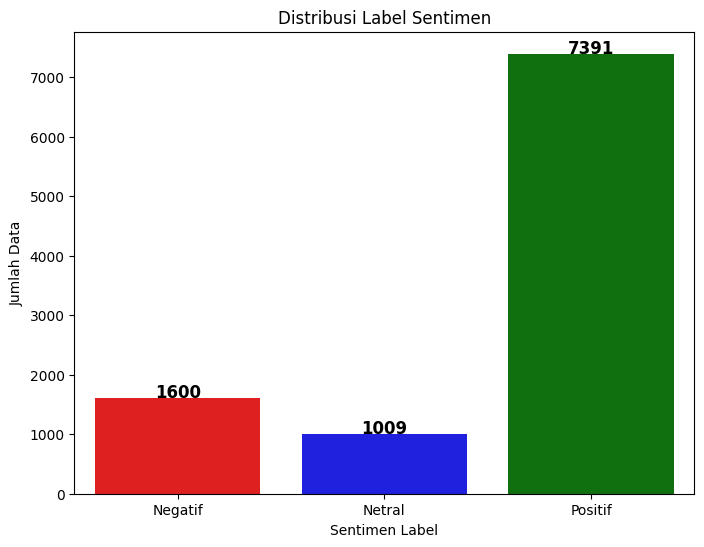

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=df['label'], palette=['red', 'blue', 'green'])

plt.xlabel("Sentimen Label")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Label Sentimen")
plt.xticks(ticks=[0, 1, 2], labels=["Negatif", "Netral", "Positif"])

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 10,
             int(p.get_height()), ha='center', fontsize=12, fontweight='bold')

plt.show()

Pada table distribusi terdapat ketimpangan data yang besar dan hal ini mempengaruhi training model ditahap selanjutnya

**Resampling with Undersampling** Mengurangi kelas positif agar seimbang

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df[['text']]
y = df['label']

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Buat DataFrame baru setelah undersampling
df_resampled = pd.DataFrame({'text': X_resampled['text'], 'label': y_resampled})

# Cek distribusi label setelah undersampling
print(df_resampled['label'].value_counts())

label
0    1009
1    1009
2    1009
Name: count, dtype: int64


**Noise Removal** untuk melakukan penghapusan angka, simbol, URL, dan karakter yang tidak diperlukan.

In [ ]:
!pip install emoji

In [ ]:
import re
import pandas as pd
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    text = text.lower()
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    return text

In [ ]:
slang_dict = {
    "u": "you", "r": "are", "btw": "by the way", "idk": "i do not know", "imo": "in my opinion",
    "brb": "be right back", "lmao": "laughing my ass off", "omg": "oh my god", "smh": "shaking my head",
    "thx": "thanks", "ty": "thank you", "np": "no problem", "gtg": "got to go", "ttyl": "talk to you later",
    "afaik": "as far as i know", "irl": "in real life", "fyi": "for your information", "tbh": "to be honest",
    "hmu": "hit me up", "wyd": "what are you doing", "gonna": "going to", "wanna": "want to",
    "gimme": "give me", "lemme": "let me", "y'all": "you all", "cuz": "because", "tho": "though",
    "dm": "direct message", "ikr": "i know right", "bff": "best friends forever", "jk": "just kidding",
    "gg": "good game", "ggwp": "good game well played", "rofl": "rolling on the floor laughing"
}

def translate_slang(text):
    words = text.split()
    return " ".join([slang_dict[word] if word in slang_dict else word for word in words])


In [ ]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)


In [ ]:
df_resampled["clean_text"] = df_resampled["text"].apply(clean_text)
df_resampled["clean_text"] = df_resampled["clean_text"].apply(translate_slang)
df_resampled["clean_text"] = df_resampled["clean_text"].apply(preprocess_text)


print(df_resampled[["text", "clean_text"]].head())

                                                   text  \
929   Honestly don’t even know where to begin becaus...   
645   I was excited to try Singapore airlines for th...   
296   The journey was good.\nThr think that very dis...   
242   Terrible experience I don't wish to anyone. My...   
2499  We missed our flight to vietnam and it cost us...   

                                             clean_text  
929   honestly dont even know begin experience many ...  
645   excited try singapore airline first time see s...  
296   journey good thr think disappointing staff che...  
242   terrible experience dont wish anyone yo daught...  
2499  missed flight vietnam cost u people aud reissu...  



# **Bert Model**

# **Kesimpulan Project**

Epoch dan Learning Rate sudah sesuai, yakni 5 dan 2e-5 dengan hasil EEpoch 5 - Train Loss: 0.3737 - Train Accuracy: 0.8650 atau 86.5%

Training model diterapkan ke data test mendapatkan F1-Score akhir 77% dengan tambahan Confussion Matrix untuk detailnya

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertForSequenceClassification, get_scheduler
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from torch.optim import AdamW

In [ ]:
X = df_resampled["clean_text"]
y = df_resampled["label"]

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, temp_idx in sss.split(X, y):
    X_train, X_temp = X.iloc[train_idx], X.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

sss = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
for val_idx, test_idx in sss.split(X_temp, y_temp):
    X_val, X_test = X_temp.iloc[val_idx], X_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

print(f"Training Data: {len(X_train)}, Validation Data: {len(X_val)}, Testing Data: {len(X_test)}")

Training Data: 2118, Validation Data: 303, Testing Data: 606


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_data(texts, labels, tokenizer, max_len=256):
    input_ids, attention_masks = [], []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0), torch.tensor(labels.values)

In [ ]:
train_inputs, train_masks, train_labels = encode_data(X_train, y_train, tokenizer)
val_inputs, val_masks, val_labels = encode_data(X_val, y_val, tokenizer)
test_inputs, test_masks, test_labels = encode_data(X_test, y_test, tokenizer)

In [ ]:
batch_size = 32
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, sampler=RandomSampler(train_data), batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, sampler=SequentialSampler(val_data), batch_size=batch_size)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, sampler=SequentialSampler(test_data), batch_size=batch_size)


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(y.unique()))
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * 4)
loss_fn = nn.CrossEntropyLoss()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
scaler = torch.cuda.amp.GradScaler()
epochs = 7
train_losses, val_losses, train_f1_scores, val_f1_scores = [], [], [], []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct, total = 0, 0

    for batch in train_dataloader:
        batch_input_ids, batch_masks, batch_labels = [b.to(device) for b in batch]
        optimizer.zero_grad()

        with torch.cuda.amp.autocast():
            outputs = model(batch_input_ids, attention_mask=batch_masks)
            loss = loss_fn(outputs.logits, batch_labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        scheduler.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs.logits, dim=1)
        correct += (preds == batch_labels).sum().item()
        total += batch_labels.size(0)

    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    train_accuracy = correct / total
    print(f"Epoch {epoch+1} - Train Loss: {avg_train_loss:.4f} - Train Accuracy: {train_accuracy:.4f}")

<ipython-input-61-dcb1388c7648>:1: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
<ipython-input-61-dcb1388c7648>:14: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 1 - Train Loss: 0.8312 - Train Accuracy: 0.6223
Epoch 2 - Train Loss: 0.5965 - Train Accuracy: 0.7493
Epoch 3 - Train Loss: 0.4860 - Train Accuracy: 0.8078
Epoch 4 - Train Loss: 0.3961 - Train Accuracy: 0.8593
Epoch 5 - Train Loss: 0.3763 - Train Accuracy: 0.8772
Epoch 6 - Train Loss: 0.3691 - Train Accuracy: 0.8772
Epoch 7 - Train Loss: 0.3802 - Train Accuracy: 0.8725


In [ ]:
# Evaluasi pada Test Set
def evaluate(model, dataloader):
    model.eval()
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in dataloader:
            batch_input_ids, batch_masks, batch_labels = [b.to(device) for b in batch]
            outputs = model(batch_input_ids, attention_mask=batch_masks)
            logits = outputs.logits
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true_labels.extend(batch_labels.cpu().numpy())

    return preds, true_labels

preds, true_labels = evaluate(model, test_dataloader)
print("Classification Report:")
print(classification_report(true_labels, preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.68      0.76       202
           1       0.63      0.71      0.67       202
           2       0.79      0.85      0.82       202

    accuracy                           0.75       606
   macro avg       0.76      0.75      0.75       606
weighted avg       0.76      0.75      0.75       606



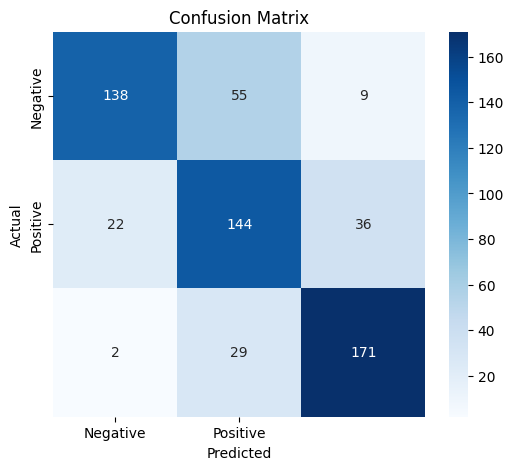

In [ ]:
# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Simpan Model
model_path = "bert_sentiment_model.pth"
torch.save(model.state_dict(), model_path)

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Tentukan nama model asli yang digunakan saat training (misal: "bert-base-uncased")
pretrained_model_name = "bert-base-uncased"

# Muat tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)

# Definisikan model dengan arsitektur yang sama (jumlah label harus sesuai dengan training)
num_labels = 3  # Pastikan ini sesuai dengan jumlah kelas saat training
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name, num_labels=num_labels)

# Muat bobot model yang telah disimpan
model_path = "bert_sentiment_model.pth"
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))  # Jika pakai GPU, ubah 'cpu' ke 'cuda'

# Pindahkan ke device (GPU jika ada)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Model siap digunakan
model.eval()
print("Model berhasil dimuat!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model berhasil dimuat!


In [ ]:
def predict_sentiment(text):
    encoded = tokenizer.encode_plus(text, add_special_tokens=True, max_length=256,
                                    padding='max_length', truncation=True, return_tensors='pt')

    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)

    model.eval()
    with torch.no_grad():
        output = model(input_ids, attention_mask=attention_mask)
        prediction = torch.argmax(output.logits, dim=1).item()
        confidence = torch.nn.functional.softmax(output.logits, dim=1).max().item()

    sentiment_labels = {0: "negative", 1: "neutral", 2: "positive"}
    sentiment = sentiment_labels.get(prediction, "unknown")

    return {"review": text, "sentiment": sentiment, "confidence": round(confidence, 2)}

sample_text = "The flight was good enough and the flight attendant is doing so well, thats great !"
result = predict_sentiment(sample_text)
print(result)


{'review': 'The flight was good enough and the flight attendant is doing so well, thats great !', 'sentiment': 'positive', 'confidence': 0.92}


# **Model Transformer Lainnya**



1.   bert-base-uncased
2.   distilbert-base-uncased
3.   roberta-base
4.   xlnet-base-cased


In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import time

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_scheduler
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report
import time

# Daftar nama model
transformer_models = [
    'bert-base-uncased',
    'distilbert-base-uncased',
    'roberta-base',
    'xlnet-base-cased'
]

def evaluate_transformer(model_name, X_train, y_train, X_val, y_val, X_test, y_test,
                         batch_size=32, epochs=3, device='cuda'):

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
    model.to(device)

    train_inputs, train_masks, train_labels = encode_data(X_train, y_train, tokenizer)
    val_inputs,   val_masks,   val_labels   = encode_data(X_val,   y_val,   tokenizer)
    test_inputs,  test_masks,  test_labels  = encode_data(X_test,  y_test,  tokenizer)

    train_ds = TensorDataset(train_inputs, train_masks, train_labels)
    train_dl = DataLoader(train_ds, sampler=RandomSampler(train_ds), batch_size=batch_size)
    test_ds  = TensorDataset(test_inputs,  test_masks,  test_labels)
    test_dl  = DataLoader(test_ds,  sampler=SequentialSampler(test_ds), batch_size=batch_size)

    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)
    scheduler = get_scheduler(
        "linear", optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=len(train_dl)*epochs
    )

    model.train()
    start = time.time()
    for _ in range(epochs):
        for batch in train_dl:
            input_ids, masks, labels = [b.to(device) for b in batch]
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask=masks, labels=labels)
            outputs.loss.backward()
            optimizer.step()
            scheduler.step()
    train_time = time.time() - start

    model.eval()
    preds, true = [], []
    with torch.no_grad():
        for batch in test_dl:
            input_ids, masks, labels = [b.to(device) for b in batch]
            logits = model(input_ids, attention_mask=masks).logits
            preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            true.extend(labels.cpu().numpy())

    report_dict = classification_report(true, preds, output_dict=True)
    return report_dict, train_time

all_reports = {}
all_times   = {}
for name in transformer_models:
    print(f"> Evaluating {name} …")
    rpt, ttime = evaluate_transformer(
        name,
        X_train, y_train,
        X_val,   y_val,
        X_test,  y_test,
        batch_size=16,
        epochs=3,
        device=device
    )
    all_reports[name] = rpt
    all_times[name]   = ttime

def print_report(name, rpt):
    total_support = int(sum(rpt[c]['support'] for c in ['0','1','2']))
    print(f"\nClassification Report: {name}")
    print("              precision    recall  f1-score   support\n")
    for c in ['0','1','2']:
        p = rpt[c]['precision']; r = rpt[c]['recall']
        f1= rpt[c]['f1-score'];   s = int(rpt[c]['support'])
        print(f"           {c}       {p:.2f}      {r:.2f}      {f1:.2f}       {s}")
    print(f"\n    accuracy                           {rpt['accuracy']:.2f}       {total_support}")
    m = rpt['macro avg']; w = rpt['weighted avg']
    print(f"   macro avg       {m['precision']:.2f}      {m['recall']:.2f}      {m['f1-score']:.2f}       {total_support}")
    print(f"weighted avg       {w['precision']:.2f}      {w['recall']:.2f}      {w['f1-score']:.2f}       {total_support}")

for model_name, report in all_reports.items():
    print_report(model_name, report)
    print(f"> Training time: {all_times[model_name]:.1f} detik\n")

**Kesimpulan**

Jika kecepatan adalah prioritas utama, DistilBERT adalah pilihan terbaik.

Jika fokus pada sentimen positif, RoBERTa memberikan hasil yang lebih baik pada kelas 2.

BERT adalah pilihan yang stabil dengan performa yang cukup baik untuk ketiga kelas.

XLNet memberikan hasil yang baik di kelas 0, tetapi memiliki waktu training yang lebih lama.

# **Classical Model - Baseline**

1.   Naive Bayes
2.   Logistic Regression
3.   Linear SVM
4.   Random Forest

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [ ]:
# Menggunakan data yang sudah dipreprocessing
# X_train, X_val, and X_test are already NumPy arrays
# Removing .values to avoid the AttributeError
X_train = X_train
X_val = X_val
X_test = X_test

# Vektorisasi teks menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Definisikan model-model klasik
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0, random_state=42),
    "Linear SVM": LinearSVC(C=1.0, random_state=42, max_iter=10000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Menyimpan hasil detail per model
detailed_reports = {}

# Training dan evaluasi model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Classification report lengkap per model
    report_dict = classification_report(y_test, y_pred, output_dict=True)

    # Pisahkan hasil per kelas dan average
    class_report = {
        '0': report_dict['0'],
        '1': report_dict['1'],
        '2': report_dict['2'],
        'accuracy': report_dict['accuracy'],
        'macro avg': report_dict['macro avg'],
        'weighted avg': report_dict['weighted avg']
    }

    # Tambahkan model ke dalam setiap laporan
    detailed_reports[name] = class_report

# Cetak dalam format yang diinginkan
for model, report in detailed_reports.items():
    print(f"\nClassification Report: {model}")
    print("              precision    recall  f1-score   support")
    for class_label in ['0', '1', '2']:
        print(f"           {class_label}       {report[class_label]['precision']:.2f}      "
              f"{report[class_label]['recall']:.2f}      {report[class_label]['f1-score']:.2f}     "
              f"{int(report[class_label]['support']):<5}")

    # Untuk accuracy, macro avg, weighted avg
    print(f"\n    accuracy                           {report['accuracy']:.2f}       {int(sum([report[class_label]['support'] for class_label in ['0', '1', '2']]))}")
    print(f"   macro avg       {report['macro avg']['precision']:.2f}      {report['macro avg']['recall']:.2f}      "
          f"{report['macro avg']['f1-score']:.2f}       {int(sum([report[class_label]['support'] for class_label in ['0', '1', '2']])): <5}")
    print(f"weighted avg       {report['weighted avg']['precision']:.2f}      {report['weighted avg']['recall']:.2f}      "
          f"{report['weighted avg']['f1-score']:.2f}       {int(sum([report[class_label]['support'] for class_label in ['0', '1', '2']])): <5}")



Classification Report: Naive Bayes
              precision    recall  f1-score   support
           0       0.80      0.65      0.72     202  
           1       0.60      0.82      0.69     202  
           2       0.88      0.71      0.78     202  

    accuracy                           0.73       606
   macro avg       0.76      0.73      0.73       606  
weighted avg       0.76      0.73      0.73       606  

Classification Report: Logistic Regression
              precision    recall  f1-score   support
           0       0.74      0.71      0.73     202  
           1       0.63      0.72      0.68     202  
           2       0.83      0.75      0.79     202  

    accuracy                           0.73       606
   macro avg       0.74      0.73      0.73       606  
weighted avg       0.74      0.73      0.73       606  

Classification Report: Linear SVM
              precision    recall  f1-score   support
           0       0.74      0.72      0.73     202  
           